In [30]:
import tweepy as tw


In [31]:
consumer_key='XFJQqxFbhaLe6fNVhxeHkyXDB'
consumer_secret='C0chD9IQ8jm3Uj13SxG7Du5kdZWFPzQIA2YzDWnMZ2eDoWS21i'
access_token='1045265658496176128-t8Vb5SmqQGLazPJgXWWUpv0YNXLIGe'
access_token_secret='xbalo9o8XaHm94hZBEU5xvga24LdyEvJU213GepGq5RUL'

In [32]:
 
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API


In [33]:
api = tw.API(auth, wait_on_rate_limit=True)

hashtag = "#presidentialdebate"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020\n🇺🇸#Debates2020 #TrumpBidenDebate\nhttps://t.co/DfBnubTidB\nPBS,NewsHour CBSNews NBCPo…', 'Timestamp': datetime.datetime(2021, 6, 26, 12, 24, 57)}, {'Tweet': "RT @WSjp_insight: 1st US #PresidentialDebate'16 excerpts.. https://t.co/IAxalj6Gxi @bencasselman @MelbInstUOM,@LaurenRosewarne,@Government_…", 'Timestamp': datetime.datetime(2021, 6, 26, 12, 24, 56)}, {'Tweet': "RT @JoeyNada76: Joe Biden's eyes are naturally blue.  So why were they black during the first #PresidentialDebate?\n\nI was just watching a c…", 'Timestamp': datetime.datetime(2021, 6, 25, 23, 26, 1)}, {'Tweet': '#environment, #vote, #legislation, #USA, #congress, , #news, #conservative, #liberal, #freedom, #whitehouse,… https://t.co/QwugedZmhb', 'Timestamp': datetime.datetime(2021, 6, 25, 21, 15, 38)}, {'Tweet': "RT @JoeyNada76: Joe Biden's eyes are naturally blue.  So why were they black during the first #PresidentialDebate?\n\nI was just watching a c…"

In [34]:
tweets[:100]

[{'Tweet': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020\n🇺🇸#Debates2020 #TrumpBidenDebate\nhttps://t.co/DfBnubTidB\nPBS,NewsHour CBSNews NBCPo…',
  'Timestamp': datetime.datetime(2021, 6, 26, 12, 24, 57)},
 {'Tweet': "RT @WSjp_insight: 1st US #PresidentialDebate'16 excerpts.. https://t.co/IAxalj6Gxi @bencasselman @MelbInstUOM,@LaurenRosewarne,@Government_…",
  'Timestamp': datetime.datetime(2021, 6, 26, 12, 24, 56)},
 {'Tweet': "RT @JoeyNada76: Joe Biden's eyes are naturally blue.  So why were they black during the first #PresidentialDebate?\n\nI was just watching a c…",
  'Timestamp': datetime.datetime(2021, 6, 25, 23, 26, 1)},
 {'Tweet': '#environment, #vote, #legislation, #USA, #congress, , #news, #conservative, #liberal, #freedom, #whitehouse,… https://t.co/QwugedZmhb',
  'Timestamp': datetime.datetime(2021, 6, 25, 21, 15, 38)},
 {'Tweet': "RT @JoeyNada76: Joe Biden's eyes are naturally blue.  So why were they black during the first #PresidentialDebate?\n\nI was just wa

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame.from_dict(tweets)
df.tail()

,Tweet,Timestamp
29,RT @SpencerKarter: More of #DonaldTrump's #Dam...,2021-06-19 04:50:51
30,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-06-18 12:22:32
31,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-06-18 12:22:27
32,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-18 12:20:23
33,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2021-06-18 12:20:18


In [37]:
trump_refs = ['DonaldTrump','Donald Trump','Donald','Trump','Trump\'s']
biden_refs = ['JoeBiden','Joe Biden','Joe','Biden','Biden\'s']


In [38]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag=1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_refs))
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_refs))

In [39]:
df[df['Trump']==1]



,Tweet,Timestamp,Trump,Biden
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-26 12:24:57,1,1
15,"RT @Justtt_J: Hillary: ""Trump your'e stupid""\n...",2021-06-21 15:50:59,1,0
20,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-20 13:03:26,1,1
22,RT @SpencerKarter: More of #DonaldTrump's #Dam...,2021-06-20 03:42:00,1,0
27,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-19 10:10:34,1,1
29,RT @SpencerKarter: More of #DonaldTrump's #Dam...,2021-06-19 04:50:51,1,0
32,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-18 12:20:23,1,1


In [40]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob


In [41]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvssr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mvssr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['preprocessed_tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()



,Tweet,Timestamp,Trump,Biden,preprocessed_tweet
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-06-26 12:24:57,1,1,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2021-06-26 12:24:56,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...
2,RT @JoeyNada76: Joe Biden's eyes are naturally...,2021-06-25 23:26:01,0,1,@JoeyNada76: Joe Biden's eye naturally blue. S...
3,"#environment, #vote, #legislation, #USA, #cong...",2021-06-25 21:15:38,0,0,"#environment, #vote, #legislation, #USA, #cong..."
4,RT @JoeyNada76: Joe Biden's eyes are naturally...,2021-06-25 06:45:00,0,1,@JoeyNada76: Joe Biden's eye naturally blue. S...


In [43]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['preprocessed_tweet'][0])

Base review
 RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020
🇺🇸#Debates2020 #TrumpBidenDebate
https://t.co/DfBnubTidB
PBS,NewsHour CBSNews NBCPo…

------------------------------------

Cleaned and lemmatized review
 @WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates2020 #TrumpBidenDebate https://t.co/DfBnubTidB PBS,NewsHour CBSNews NBCPo…


In [44]:
# Calculate polarity
df['polarity'] = df['preprocessed_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['preprocessed_tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['preprocessed_tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].tail(20)

,preprocessed_tweet,Biden,Trump,polarity,subjectivity
14,@cimajiebest: Summary 45🗣“I know I” Joe🗣“I kno...,1,0,0.000,0.00
15,"@Justtt_J: Hillary: ""Trump your'e stupid"" Trum...",0,1,-0.800,1.00
16,"@JoyceThaVoice: #debate To sum up, “I know are...",0,0,0.000,0.00
17,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...,0,0,0.000,0.00
18,@FuturesTradeMag: A Heated Presidential Debate...,0,0,0.000,0.00
19,@Doctor_GAM: @AOC @AyannaPressley @IlhanMN @Ra...,0,0,0.000,0.00
20,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...,1,1,0.000,0.00
21,@WSjp_insight: 2nd US article https://t.co/3ui...,0,0,0.000,0.00
22,@SpencerKarter: More #DonaldTrump's #DamnLies....,0,1,0.625,0.50
23,@Nickisnotfunny: The current President United ...,0,0,-0.250,0.55


In [45]:
import numpy as np

In [46]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                    subjectivity                 
           mean   amax amin median         mean amax amin median
Trump                                                           
1      0.064286  0.625 -0.8    0.0     0.285714  1.0  0.0    0.0

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Biden                                                         
1      0.064815  0.5  0.0    0.0     0.151852  0.5  0.0    0.0

In [47]:
biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [48]:
biden.head()

,Timestamp,polarity,MA Polarity
32,2021-06-18 12:20:23,0.0,NaN
27,2021-06-19 10:10:34,0.0,NaN
20,2021-06-20 13:03:26,0.0,0.0
14,2021-06-21 15:51:09,0.0,0.0
10,2021-06-24 07:50:37,0.5,0.1


In [49]:
from matplotlib import pyplot as plt

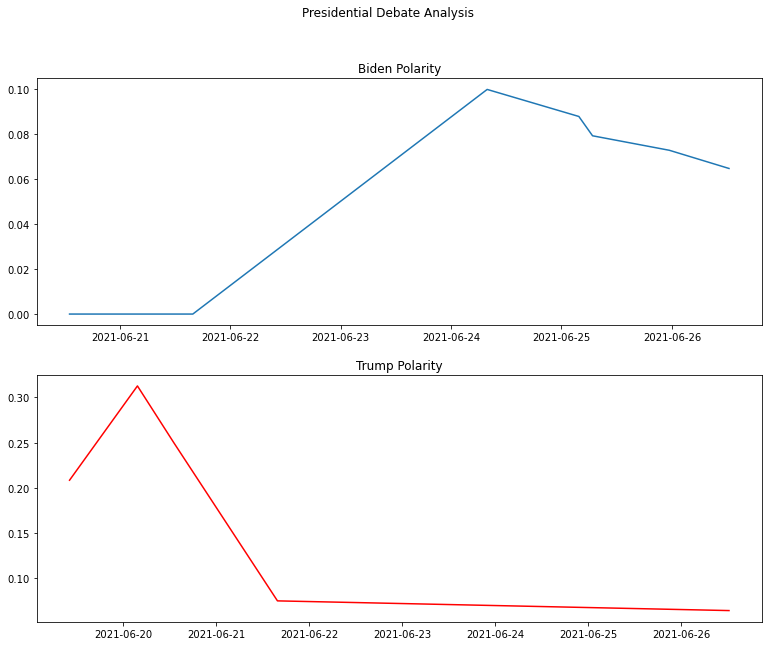

In [50]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))

axes[1].plot(trump['Timestamp'], trump['MA Polarity'],color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()